In [5]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import *

In [6]:
spec_names=('gap', 'shifted_gap','shifted_gap_2', 'log10_gap', 'log10_shifted_gap', 'log10_shifted_gap_2', 'ratio')

In [19]:
dim_loc=4
L=4
n_dis=100
simdict={'dim_loc': dim_loc, 'L': L, 'n_dis': n_dis}
phi=np.pi/3
lambd=0.1
eps=0.1
time_set= np.power(3, np.arange(40))
idata={'JZZ': 1.0, 'hZ': 1.0, 'hX': 1.0, 'alphas': np.array([(1-lambd)*np.exp(1j*phi)/2, 1, (1-lambd)*np.exp(-1j*phi)/2]),\
       'betas': np.array([eps*lambd*(1-lambd),lambd, eps*lambd*(1-lambd)]), 'lambdas': np.array([0,1,0]),\
       'phi': phi, 'lambd': lambd}
filename='clock4/clock4_%d_%.2f.txt' %(L,lambd)

In [20]:
clockH, clockK, clockZ = clock(dim_loc, L)
Z_mean, Z_var, Y_mean, Y_var, spectral_data, spectral_data_var = simulation(dim_loc, L, n_dis, idata, clockH, clockK, clockZ, time_set)

with open(filename, 'wb') as f:
        for key, value in simdict.items():
            f.write(('\n# '+key+' '+str(value)).encode('utf-8'))
        for key, value in idata.items():
            f.write(('\n# '+key+' '+str(value)).encode('utf-8'))
        for i in range(5):
            f.write(('\n# '+spec_names[i]+' '+str(spectral_data[i])+' '+str(spectral_data_var[i])).encode('utf-8'))
        f.write('\n# time\tRe(Z)\Im(Z)\tVar(Re(Z))\tVar(Im(Z))\n'.encode('utf-8'))
        np.savetxt(f, np.stack((time_set, np.real(Z_mean), np.imag(Z_mean),\
                    np.real(Z_var), np.imag(Z_var), np.real(Y_mean), np.imag(Y_mean),\
                                np.real(Y_var), np.imag(Y_var)), axis=-1))

/home/federica/Dropbox/Master/plot_tesi/2018/simulation.py:38: RuntimeWarning: divide by zero encountered in log10
  log10_shifted_gaps_2 = np.log10(shifted_gap(spectrum, 2))
/home/federica/Dropbox/Master/plot_tesi/2018/operators.py:44: RuntimeWarning: overflow encountered in power
  state_0_diag[:, np.newaxis]*(eigval[:, np.newaxis]**time_set))))
/home/federica/Dropbox/Master/plot_tesi/2018/operators.py:44: RuntimeWarning: invalid value encountered in multiply
  state_0_diag[:, np.newaxis]*(eigval[:, np.newaxis]**time_set))))
/home/federica/anaconda3/lib/python3.5/site-packages/numpy/linalg/linalg.py:2197: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
/home/federica/anaconda3/lib/python3.5/site-packages/numpy/linalg/linalg.py:2197: RuntimeWarning: invalid value encountered in multiply
  s = (x.conj() * x).real


[ -9.99930506e-01 +3.92212890e-16j  -9.99474805e-01 +1.16859959e-16j
  -9.96972388e-01 +3.45323942e-16j  -9.84004119e-01 +1.16307006e-16j
  -9.97093751e-01 +3.37272682e-16j  -9.91846527e-01 +5.85842196e-17j
  -9.83150457e-01 +3.35057465e-16j  -9.95030981e-01 +6.54684427e-17j
  -9.97234015e-01 +2.90159781e-16j  -9.93758667e-01 +3.24596862e-16j
  -9.78279142e-01 +3.65703822e-16j  -9.49145219e-01 +1.81915482e-16j
  -6.69606071e-01 +1.08801600e-16j  -7.25000744e-02 +8.08838564e-17j
  -4.67725805e-01 +1.50969811e-16j  -6.18420960e-01 +1.24852981e-16j
  -1.84876514e-01 +8.64753198e-17j  -9.22656046e-01 +1.66281259e-16j
  -4.90514701e-01 +6.24841746e-17j  -4.96036406e-01 +2.04569855e-16j
  -4.88174370e-01 +5.10696313e-17j  -4.93248669e-01 +1.40917021e-16j
  -4.93864230e-01 +1.83255595e-16j  -5.01877684e-01 +6.80227028e-17j
  -4.72290754e-01 +1.15571292e-16j  -5.62920949e-01 +2.69786821e-16j
  -3.07946076e-01 +1.35199518e-16j  -9.42114556e-01 +1.96107399e-16j
  -7.11953653e-01 +1.11351665e-16j

/home/federica/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [23]:
import re

lenarr=len(time_set)

dt = np.dtype([('JZZ', np.float64), ('hZ', np.float64), ('hX', np.float64), 
               ('FILENAME', np.unicode_, 32), ('phi', np.float64), ('dim_loc', np.int32),
               ('n_dis', np.int32), ('L', np.int32), ('time_set', np.float64, (lenarr,)),
               ('ReZ', np.float64, (lenarr,)), ('ImZ', np.float64, (lenarr,)), ('ReVarZ', np.float64, (lenarr,)),
               ('ImVarZ', np.float64, (lenarr,)), ('ReY', np.float64, (lenarr,)), ('ImY', np.float64, (lenarr,)), ('ReVarY', np.float64, (lenarr,)),
               ('ImVarY', np.float64, (lenarr,))])

def get_data(file):
    d = np.zeros([], dtype=dt)
    d['FILENAME']=file
    with open(file) as f:
        for line in f:
            try:
                m = re.match("# (\S+) ([-+]?\d+.\d+e[+-]?\d+)", line)
                d[m.group(1)]=float(m.group(2))
            except:
                try:
                    m = re.match("# (\S+) ([-+]?\d+.\d+)", line)
                    d[m.group(1)]=float(m.group(2))                  
                except:
                    try:
                        m = re.match("# (\S+) (\d+)", line)
                        d[m.group(1)]=int(m.group(2))                       
                    except: pass
    d['time_set'], d['ReZ'], d['ImZ'], d['ReVarZ'], d['ImVarZ'],\
    d['ReY'], d['ImY'], d['ReVarY'], d['ImVarY']=np.genfromtxt(file, unpack=True, dtype=np.complex128)
    return d

In [24]:
dataset=np.empty(0, dtype=dt)
for L in range(2,5):
    d=get_data('clock4/clock4_%d_0.10.txt' %L)
    dataset=np.append(dataset, d)

/home/federica/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:29: ComplexWarning: Casting complex values to real discards the imaginary part


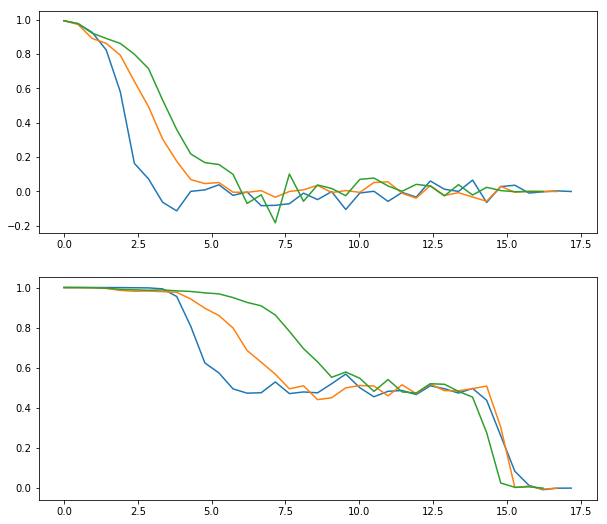

In [25]:
f, ax = plt.subplots(2,1,figsize=(10,9))

for sim in dataset:
    ax[0].plot(np.log10(sim['time_set']), sim['ReZ'],label= r'$L=$%d' % L)
    ax[1].plot(np.log10(sim['time_set']), sim['ReY'],label= r'$L=$%d' % L)

plt.show()